In [34]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plot
import numpy as np # álgebra linear
import os # acesso ao diretório
import pandas as pd # processamento dos dados .csv
import math
from starter_pack.func_analysis import plotPerColumnDistribution, plotCorrelationMatrix, plotScatterMatrix

### Vamos verificar 2nd arquivo: /kaggle/input/csv/meta.csv

In [35]:
nRowsRead = 1000 # especifique 'None' se quiser ler o arquivo inteiro
# meta.csv pode ter mais linhas na realidade, mas estamos carregando/visualizando apenas as primeiras 1000 linhas
df2 = pd.read_csv('/home/rafatokairin/uni-programs/ic/csv/meta.csv', delimiter=',', nrows = nRowsRead)
df2.dataframeName = 'meta.csv'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 9 columns


Vamos dar uma olhada rápida em como os dados se apresentam:

In [36]:
df2.head(5)

,SeriesInstanceUID,StudyInstanceUID,Modality,SeriesDescription,BodyPartExamined,SeriesNumber,Collection,Visibility,ImageCount
0,1.3.6.1.4.1.9590.100.1.2.117041576511324414842...,1.3.6.1.4.1.9590.100.1.2.229361142710768138411...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2
1,1.3.6.1.4.1.9590.100.1.2.438738396107617880132...,1.3.6.1.4.1.9590.100.1.2.195593486612988388325...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2
2,1.3.6.1.4.1.9590.100.1.2.767416741131676463382...,1.3.6.1.4.1.9590.100.1.2.257901172612530623323...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2
3,1.3.6.1.4.1.9590.100.1.2.296931352612305599800...,1.3.6.1.4.1.9590.100.1.2.109468616710242115222...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2
4,1.3.6.1.4.1.9590.100.1.2.436657670120353100077...,1.3.6.1.4.1.9590.100.1.2.380627129513562450304...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2


In [37]:
# dimensões do arquivo
df2.shape

(1000, 9)

In [38]:
# informações do arquivo
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   SeriesInstanceUID  1000 non-null   object
 1   StudyInstanceUID   1000 non-null   object
 2   Modality           1000 non-null   object
 3   SeriesDescription  1000 non-null   object
 4   BodyPartExamined   1000 non-null   object
 5   SeriesNumber       1000 non-null   int64 
 6   Collection         1000 non-null   object
 7   Visibility         1000 non-null   int64 
 8   ImageCount         1000 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 70.4+ KB


In [39]:
df2.isnull().sum()

SeriesInstanceUID    0
StudyInstanceUID     0
Modality             0
SeriesDescription    0
BodyPartExamined     0
SeriesNumber         0
Collection           0
Visibility           0
ImageCount           0
dtype: int64

Verificar os valores únicos em cada coluna

In [40]:
valores_unicos = []
for i in df2.columns[0:10].tolist():
    print(i, ':', len(df2[i].astype(str).value_counts()))
    valores_unicos.append(len(df2[i].astype(str).value_counts()))

SeriesInstanceUID : 1000
StudyInstanceUID : 1000
Modality : 1
SeriesDescription : 3
BodyPartExamined : 1
SeriesNumber : 1
Collection : 1
Visibility : 1
ImageCount : 2


In [41]:
df2.describe()

,SeriesNumber,Visibility,ImageCount
count,1000.0,1000.0,1000.000000
mean,1.0,1.0,1.841000
std,0.0,0.0,0.365859
min,1.0,1.0,1.000000
25%,1.0,1.0,2.000000
50%,1.0,1.0,2.000000
75%,1.0,1.0,2.000000
max,1.0,1.0,2.000000


Gráficos de distribuição (histograma/gráfico de barras) das colunas amostradas:

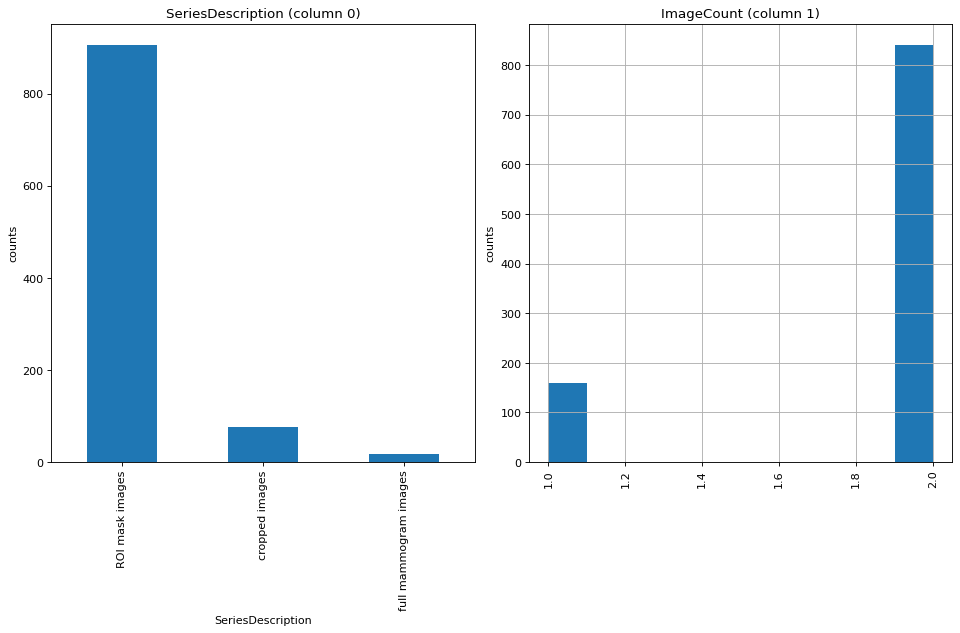

In [42]:
plotPerColumnDistribution(df2, 10, 5)

Matriz de correlação:

In [43]:
plotCorrelationMatrix(df2, 8)

No correlation plots shown: The number of non-NaN or constant columns (1) is less than 2


Gráficos de dispersão e densidade:

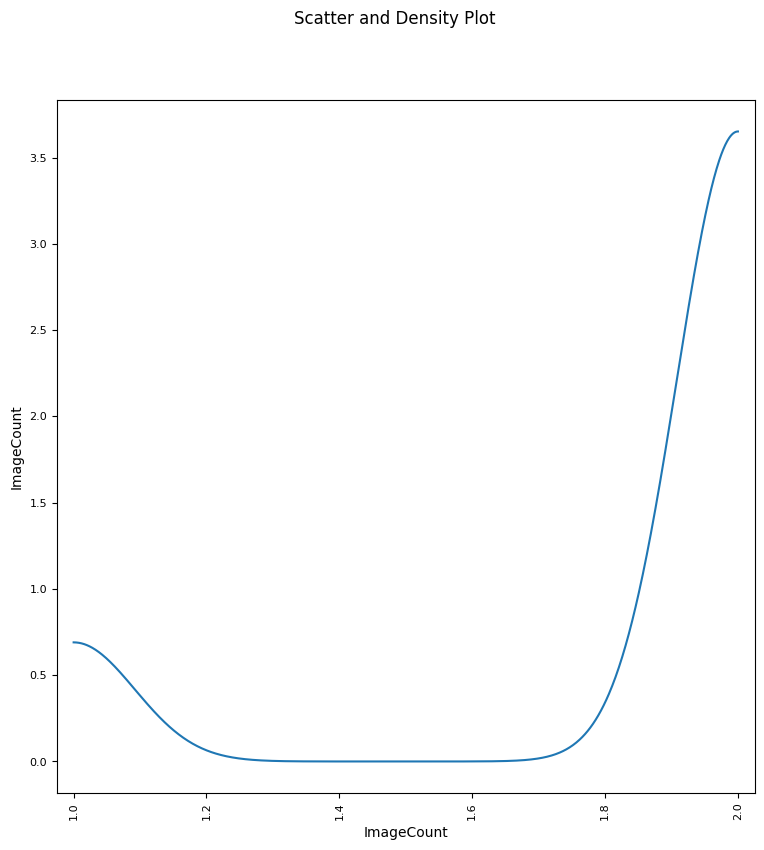

In [44]:
plotScatterMatrix(df2, 9, 10)